## Task no 1. 
Perform preprocessing on the dataset by handling missing values and normalizing features. 
Ensure the data is ready for clustering analysis.



In [1]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the built-in 'diamonds' dataset
data = sns.load_dataset('diamonds')

# Display the first few rows
print(data.head())

# Handle missing values using SimpleImputer (filling with the mean for numerical columns)
imputer = SimpleImputer(strategy='mean')
data_imputed = data.copy()
data_imputed[['carat', 'depth', 'price', 'x', 'y', 'z']] = imputer.fit_transform(data_imputed[['carat', 'depth', 'price', 'x', 'y', 'z']])

# Normalize the features (scaling them to have zero mean and unit variance)
scaler = StandardScaler()
data_scaled = data_imputed[['carat', 'depth', 'price', 'x', 'y', 'z']]
data_scaled = scaler.fit_transform(data_scaled)

# Display the normalized data
print(data_scaled[:5])


   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
[[-1.19816781 -0.17409151 -0.90409516 -1.58783745 -1.53619556 -1.57112919]
 [-1.24036129 -1.36073849 -0.90409516 -1.64132529 -1.65877419 -1.74117497]
 [-1.19816781 -3.38501862 -0.9038445  -1.49869105 -1.45739502 -1.74117497]
 [-1.07158736  0.45413336 -0.90208985 -1.36497146 -1.31730516 -1.28771955]
 [-1.02939387  1.08235823 -0.90183918 -1.24016651 -1.21223777 -1.11767377]]


## Task no 2. 
Use the K-Means algorithm to cluster the data into a specified number of clusters (e.g., 3 
clusters). Visualize the clustering results using a scatter plot.



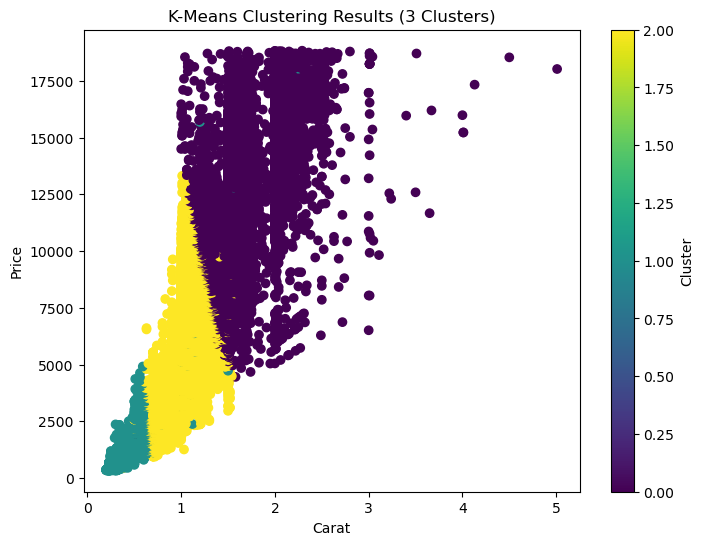

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the dataset
data_imputed['cluster'] = kmeans.labels_

# Visualize the clustering results using a scatter plot (e.g., plotting 'carat' vs. 'price')
plt.figure(figsize=(8, 6))
plt.scatter(data_imputed['carat'], data_imputed['price'], c=data_imputed['cluster'], cmap='viridis')
plt.title('K-Means Clustering Results (3 Clusters)')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.colorbar(label='Cluster')
plt.show()


## Task no 3. 
Implement the Elbow Method to determine the optimal number of clusters for the KMeans algorithm. Plot the Within-Cluster Sum of Squares (WCSS) against the number of 
clusters to identify the 'elbow' point.

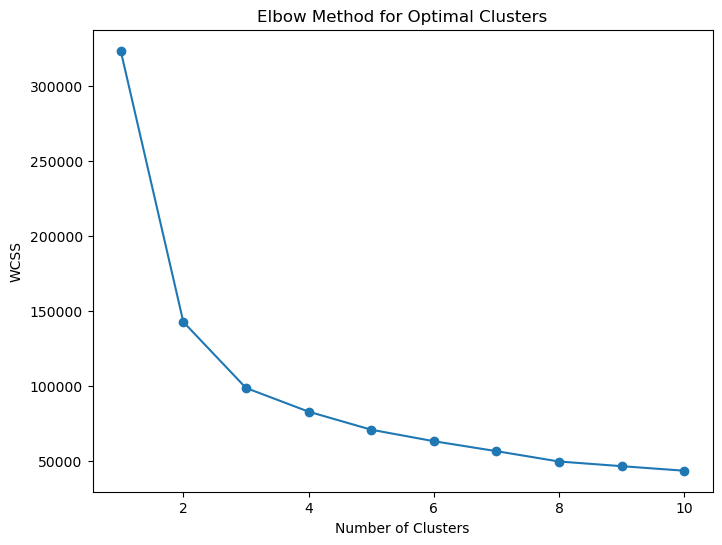

In [3]:
# Elbow Method to find the optimal number of clusters
wcss = []
for k in range(1, 11):  # Trying cluster counts from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


## Task no 4. 
Perform Hierarchical Clustering using Agglomerative Clustering. Create a dendrogram to 
visualize the clustering structure and then cluster the data into a specified number of 
clusters. Plot the results.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Create the Dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

# Perform Agglomerative Clustering (using 3 clusters as an example)
agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
data_imputed['agg_cluster'] = agg_clustering.fit_predict(data_scaled)

# Visualize the hierarchical clustering results (using 'carat' vs. 'price')
plt.figure(figsize=(8, 6))
plt.scatter(data_imputed['carat'], data_imputed['price'], c=data_imputed['agg_cluster'], cmap='viridis')
plt.title('Agglomerative Clustering Results (3 Clusters)')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.colorbar(label='Cluster')
plt.show()


## Task no 5. 
Calculate and interpret the Silhouette Score for the K-Means clustering results. Discuss the 
cluster cohesion and separation based on the Silhouette Score.

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score for the K-Means clustering results
sil_score = silhouette_score(data_scaled, kmeans.labels_)

print(f'Silhouette Score for K-Means Clustering: {sil_score:.4f}')


KeyboardInterrupt: 